### Importing libraries

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import datetime as dt

### Loading Data

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.rename({'Calldate':'CallDate','Calltime':'CallTime'},inplace=True,axis=1)
df['ArrivalDiff'] = df.groupby(['CallDate'])['ArrivalTime'].diff().fillna(df['ArrivalTime'])
df['CallTime'] = pd.to_datetime(df['CallTime'])
df

,Unnamed: 0,CallDate,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff
0,1,3/1/2019,3/1/2019 7:00,49.200555,2019-03-01 07:00:00,Friday,49.200555
1,2,3/1/2019,3/1/2019 7:00,122.414881,2019-03-01 07:02:00,Friday,73.214326
2,3,3/1/2019,3/1/2019 7:00,123.065306,2019-03-01 07:02:00,Friday,0.650425
3,4,3/1/2019,3/1/2019 7:00,127.141871,2019-03-01 07:02:00,Friday,4.076565
4,5,3/1/2019,3/1/2019 7:00,133.632700,2019-03-01 07:02:00,Friday,6.490828
5,6,3/1/2019,3/1/2019 7:00,136.109967,2019-03-01 07:02:00,Friday,2.477267
6,7,3/1/2019,3/1/2019 7:00,152.023191,2019-03-01 07:02:00,Friday,15.913224
7,8,3/1/2019,3/1/2019 7:00,191.635916,2019-03-01 07:03:00,Friday,39.612725
8,9,3/1/2019,3/1/2019 7:00,404.644251,2019-03-01 07:06:00,Friday,213.008335
9,10,3/1/2019,3/1/2019 7:00,427.121026,2019-03-01 07:07:00,Friday,22.476774


### Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237003 entries, 0 to 237002
Data columns (total 7 columns):
Unnamed: 0     237003 non-null int64
CallDate       237003 non-null object
DialStart      237003 non-null object
ArrivalTime    237003 non-null float64
CallTime       237003 non-null datetime64[ns]
DayOfWeek      237003 non-null object
ArrivalDiff    237003 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.7+ MB


In [9]:
df.describe()

,Unnamed: 0,ArrivalTime,ArrivalDiff
count,237003.000000,237003.000000,237003.000000
mean,118502.000000,28762.032824,22.347196
std,68417.017262,16627.337816,25.959783
min,1.000000,0.207967,0.000100
25%,59251.500000,14361.180105,5.810210
50%,118502.000000,28721.639610,14.246700
75%,177752.500000,43171.631455,29.431985
max,237003.000000,57599.865680,452.422690


Tried to see which days of the week the call center functions.

In [10]:
df['DayOfWeek'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [12]:
df['Calldate'] = pd.to_datetime(df['CallDate'])

Calculated the difference in Arrivals of consecutive calls.

Grouped Calls by time and tried to see what is the maximum time till which the call center functions. It seems the call center functions till 23:00.

In [13]:
df.groupby(['CallDate'])['CallTime'].max()

CallDate
3/1/2019    2019-03-01 22:59:00
3/10/2019   2019-03-10 22:59:00
3/11/2019   2019-03-11 22:59:00
3/12/2019   2019-03-12 22:59:00
3/13/2019   2019-03-13 22:59:00
3/14/2019   2019-03-14 22:59:00
3/15/2019   2019-03-15 22:59:00
3/16/2019   2019-03-16 22:59:00
3/17/2019   2019-03-17 22:59:00
3/18/2019   2019-03-18 22:59:00
3/19/2019   2019-03-19 22:59:00
3/2/2019    2019-03-02 22:59:00
3/20/2019   2019-03-20 22:59:00
3/21/2019   2019-03-21 22:59:00
3/22/2019   2019-03-22 22:58:00
3/23/2019   2019-03-23 22:59:00
3/24/2019   2019-03-24 22:58:00
3/25/2019   2019-03-25 22:59:00
3/26/2019   2019-03-26 22:59:00
3/27/2019   2019-03-27 22:59:00
3/28/2019   2019-03-28 22:59:00
3/29/2019   2019-03-29 22:59:00
3/3/2019    2019-03-03 22:55:00
3/30/2019   2019-03-30 22:59:00
3/31/2019   2019-03-31 22:59:00
3/4/2019    2019-03-04 22:59:00
3/5/2019    2019-03-05 22:59:00
3/6/2019    2019-03-06 22:59:00
3/7/2019    2019-03-07 22:59:00
3/8/2019    2019-03-08 22:59:00
                    ...        

Plotted the arrival differences between calls. We can see the arrival differences follow an exponential distribution.

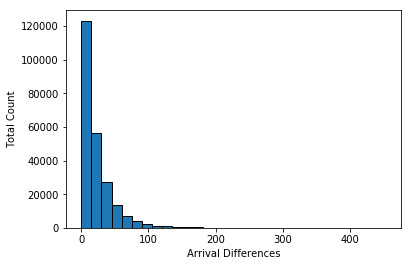

In [14]:
plt.xlabel("Arrival Differences")
plt.ylabel("Total Count")
plt.hist(df['ArrivalDiff'],bins=30,edgecolor='black')
plt.show()

We plotted the arrival differences with respect to call date. We can see a sort of a repeating pattern here.

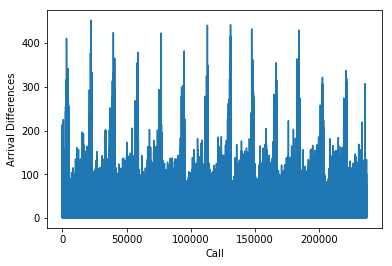

In [15]:
cd = df[['CallDate','ArrivalDiff']]
l = [i for i in range(len(cd.CallDate))]
plt.plot(l,cd.ArrivalDiff)
plt.xlabel('Call')
plt.ylabel('Arrival Differences')
plt.show()

We grouped by call date and found out the number of calls on each date.

In [16]:
callsEachDay = df.groupby(["CallDate"]).size()

In [17]:
callsEachDay

CallDate
3/1/2019     2535
3/10/2019    1171
3/11/2019    3828
3/12/2019    3420
3/13/2019    2983
3/14/2019    2683
3/15/2019    2644
3/16/2019    1434
3/17/2019    1146
3/18/2019    3851
3/19/2019    3388
3/2/2019     1374
3/20/2019    2871
3/21/2019    2707
3/22/2019    2623
3/23/2019    1492
3/24/2019    1125
3/25/2019    3787
3/26/2019    3329
3/27/2019    2878
3/28/2019    2804
3/29/2019    2627
3/3/2019     1122
3/30/2019    1441
3/31/2019    1200
3/4/2019     3838
3/5/2019     3475
3/6/2019     2865
3/7/2019     2735
3/8/2019     2488
             ... 
5/10/2019    2639
5/11/2019    1430
5/12/2019    1201
5/13/2019    3906
5/14/2019    3375
5/15/2019    2887
5/16/2019    2750
5/17/2019    2571
5/18/2019    1514
5/19/2019    1139
5/2/2019     2730
5/20/2019    3894
5/21/2019    3329
5/22/2019    2906
5/23/2019    2733
5/24/2019    2689
5/25/2019    1478
5/26/2019    1121
5/27/2019    3826
5/28/2019    3406
5/29/2019    2780
5/3/2019     2615
5/30/2019    2731
5/31/2019    2604
5

We also found out the average number of calls each day.

In [18]:
statistics.mean(callsEachDay)

2576.1195652173915

In [19]:
callsEachDay = pd.DataFrame(callsEachDay)

callsEachDay.reset_index(inplace=True)
callsEachDay.rename({0:'TotalCalls'},inplace=True,axis=1)
callsEachDay


,CallDate,TotalCalls
0,3/1/2019,2535
1,3/10/2019,1171
2,3/11/2019,3828
3,3/12/2019,3420
4,3/13/2019,2983
5,3/14/2019,2683
6,3/15/2019,2644
7,3/16/2019,1434
8,3/17/2019,1146
9,3/18/2019,3851


In [20]:
callsEachDay.describe()

,TotalCalls
count,92.000000
mean,2576.119565
std,900.737950
min,1118.000000
25%,1488.500000
50%,2730.500000
75%,3329.000000
max,3924.000000


We made a plot of call count against each date.

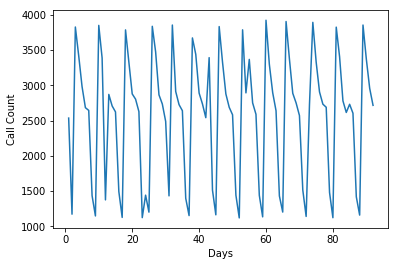

In [21]:
lst = [i for i in range(1,93)]
plt.xlabel('Days')
plt.ylabel("Call Count")
plt.plot(lst,callsEachDay.TotalCalls)
plt.show()

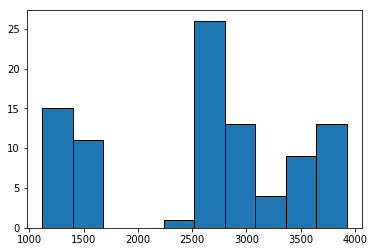

In [22]:
plt.hist(callsEachDay.TotalCalls,edgecolor='black')
plt.show()

We also calculated the call count for each day of Week.

In [23]:
callsByDayOfWeek = df.groupby(["DayOfWeek"]).size()

In [24]:
callsByDayOfWeek

DayOfWeek
Friday       36387
Monday       49861
Saturday     18800
Sunday       14947
Thursday     35490
Tuesday      43921
Wednesday    37597
dtype: int64

In [25]:
callsWithDay = df.groupby(["CallDate","DayOfWeek"]).size()

In [26]:
data = pd.DataFrame(callsWithDay)
data.reset_index(inplace=True)
data

,CallDate,DayOfWeek,0
0,3/1/2019,Friday,2535
1,3/10/2019,Sunday,1171
2,3/11/2019,Monday,3828
3,3/12/2019,Tuesday,3420
4,3/13/2019,Wednesday,2983
5,3/14/2019,Thursday,2683
6,3/15/2019,Friday,2644
7,3/16/2019,Saturday,1434
8,3/17/2019,Sunday,1146
9,3/18/2019,Monday,3851


We made a scatter and a swarm plot of call counts against day of Week. We found that there is a subtle pattern. The call counts against the day of week are quite consistent i.e. on Mondays we can expect 3600-4000 calls, on Tuesdays we can expect 3400-3500 calls so and so forth.

[]

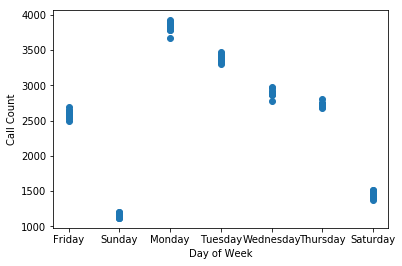

In [27]:
plt.xlabel('Day of Week')
plt.ylabel('Call Count')
plt.scatter(data['DayOfWeek'],data[0])
plt.plot()

[]

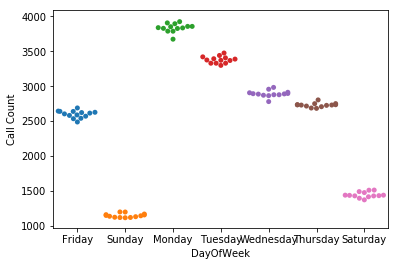

In [28]:
plt.xlabel('Day of Week')
plt.ylabel('Call Count')
sns.swarmplot(data['DayOfWeek'],list(data[0]))
plt.plot()

We divide the day into 4 chunks i.e. morning afternoon and evening. To see if there is a particular time frame of the day where we can expect more calls.

In [29]:
df['CallTiming'] = df['CallTime'].dt.time

In [30]:
morning = (df['CallTiming']>=dt.time(hour=7,minute=0))&(df['CallTiming']<=dt.time(hour=12,minute=0))
afternoon = (df['CallTiming']>dt.time(hour=12,minute=0))&(df['CallTiming']<=dt.time(hour=16,minute=0))
evening = (df['CallTiming']>dt.time(hour=16,minute=0))&(df['CallTiming']<=dt.time(hour=19,minute=0))
night = (df['CallTiming']>dt.time(hour=19,minute=0))&(df['CallTiming']<=dt.time(hour=23,minute=59))

In [31]:
df.loc[morning,'Interval'] = 'morning'
df.loc[afternoon,'Interval'] = 'afternoon'
df.loc[evening,'Interval'] = 'evening'
df.loc[night,'Interval'] = 'night'

In [32]:
countByInterval = df.groupby(['CallDate','Interval']).size()
#countByInterval

In [33]:
countByInterval = pd.DataFrame(countByInterval)
countByInterval.reset_index(inplace=True)
countByInterval

,CallDate,Interval,0
0,3/1/2019,afternoon,635
1,3/1/2019,evening,496
2,3/1/2019,morning,787
3,3/1/2019,night,617
4,3/10/2019,afternoon,285
5,3/10/2019,evening,234
6,3/10/2019,morning,345
7,3/10/2019,night,307
8,3/11/2019,afternoon,975
9,3/11/2019,evening,706


The swarm plot shows that Mornings have more calls, Afternoons and Nights have more or less same number of calls. Evening has lesser number of call. This may be also due to the fact that the number of hours for morning, night, afternoon and evening are different. Hence, we cannot say anything conclusively here.

[]

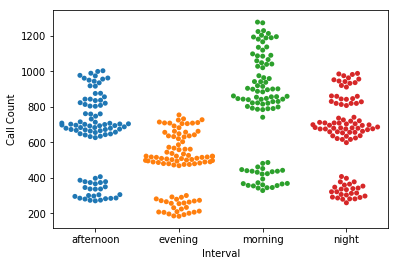

In [34]:
plt.xlabel('Interval')
plt.ylabel('Call Count')
sns.swarmplot(countByInterval['Interval'],list(countByInterval[0]))
plt.plot()

In [35]:
countByDayInterval = df.groupby(['DayOfWeek','Interval']).size()


In [36]:
countByDayInterval = pd.DataFrame(countByDayInterval)
countByDayInterval.reset_index(inplace=True)
countByDayInterval.sort_values(by=0)

,DayOfWeek,Interval,0
13,Sunday,evening,2696
9,Saturday,evening,3564
12,Sunday,afternoon,3748
15,Sunday,night,3839
11,Saturday,night,4658
14,Sunday,morning,4664
8,Saturday,afternoon,4774
10,Saturday,morning,5804
17,Thursday,evening,6588
1,Friday,evening,6824


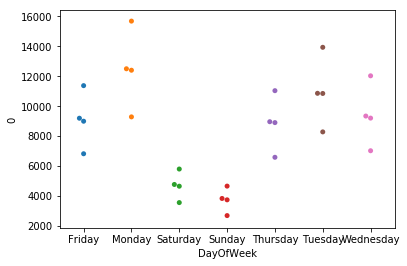

In [37]:
sns.swarmplot(countByDayInterval['DayOfWeek'],countByDayInterval[0])
plt.show()

We break each day into hours and then create a histogram to see is there a particular hour on each day of the week which has more calls. More or less from the histograms it seems that the calls are randomly distributed in the day and there is no peak hour.

We also make a histogram of arrival differences of each day of the week. The histograms show that for each day of the week the data is also exponentially distributed.

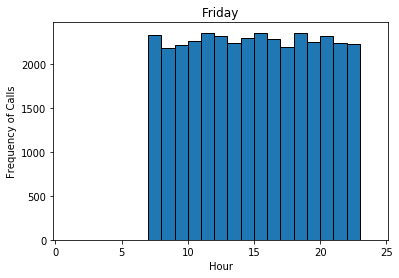

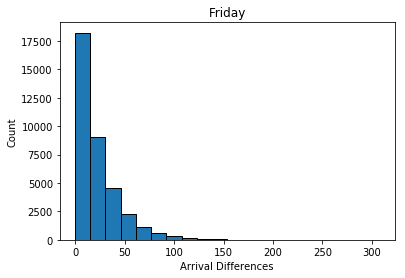

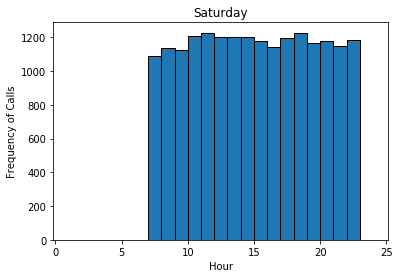

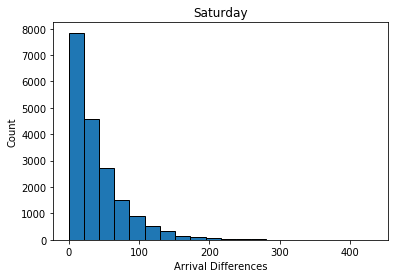

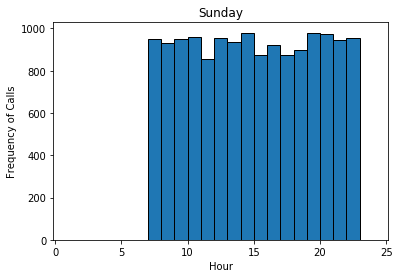

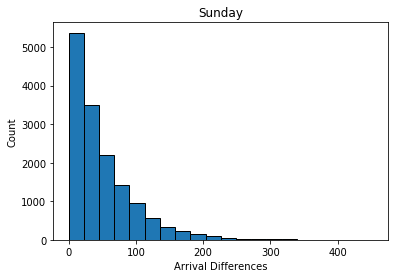

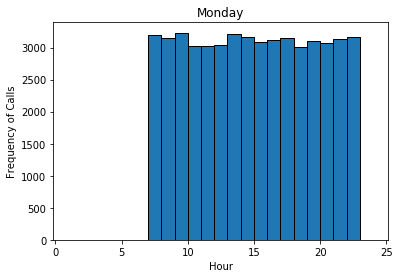

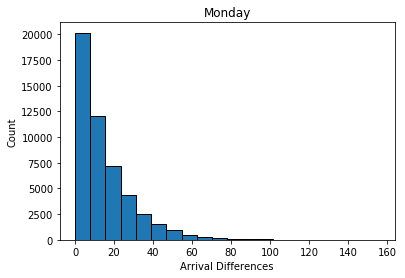

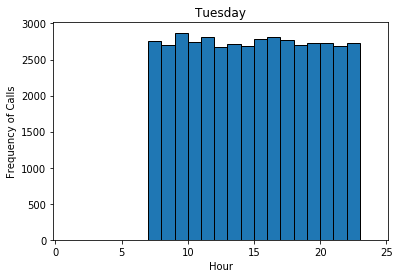

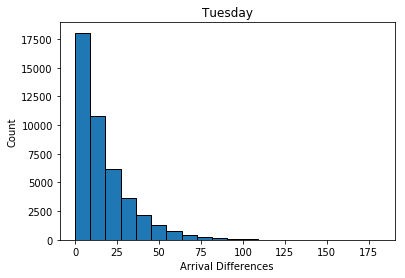

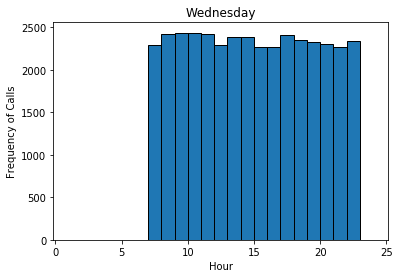

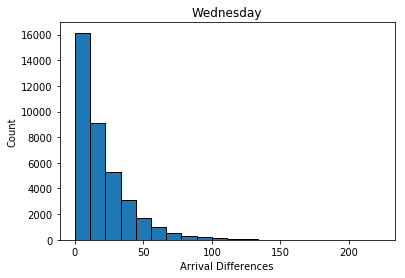

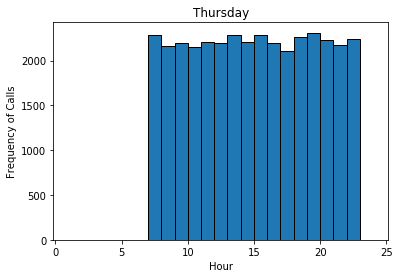

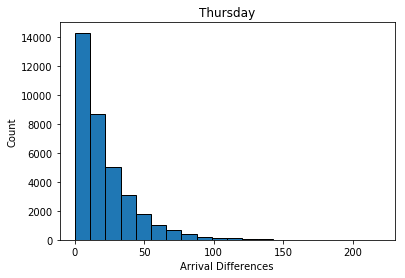

In [38]:
days = list(df.DayOfWeek.unique())
for i in days:
    data = df[df["DayOfWeek"]==i]
    plt.hist(data['CallTime'].dt.hour,edgecolor='black',bins=list(range(1,25)))
    plt.title(i)
    plt.xlabel('Hour')
    plt.ylabel('Frequency of Calls')
    plt.show()
    plt.title(i)
    plt.hist(data['ArrivalDiff'],edgecolor='black',bins=20)
    plt.xlabel('Arrival Differences')
    plt.ylabel('Count')

    plt.show()


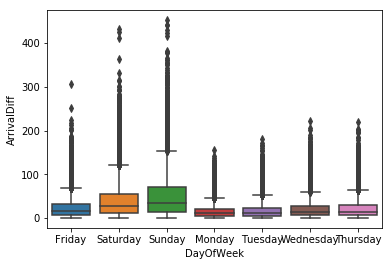

In [39]:
sns.boxplot(x="DayOfWeek", y="ArrivalDiff", data=df)
plt.show()

Also made table of call counts for each hour against the Days of Week.

In [40]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

days = list(df.DayOfWeek.unique())
for i in days:
    print(i)
    data = df[df["DayOfWeek"]==i]
    print(data.groupby(data["CallTime"].dt.hour).count())

Friday
          Unnamed: 0  CallDate  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval
CallTime                                                                                                                
7               2331      2331       2331         2331      2331       2331         2331      2331        2331      2331
8               2185      2185       2185         2185      2185       2185         2185      2185        2185      2185
9               2214      2214       2214         2214      2214       2214         2214      2214        2214      2214
10              2259      2259       2259         2259      2259       2259         2259      2259        2259      2259
11              2351      2351       2351         2351      2351       2351         2351      2351        2351      2351
12              2314      2314       2314         2314      2314       2314         2314      2314        2314      2314
13              2233     

22              2728      2728       2728         2728      2728       2728         2728      2728        2728      2728
Wednesday
          Unnamed: 0  CallDate  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval
CallTime                                                                                                                
7               2296      2296       2296         2296      2296       2296         2296      2296        2296      2296
8               2417      2417       2417         2417      2417       2417         2417      2417        2417      2417
9               2436      2436       2436         2436      2436       2436         2436      2436        2436      2436
10              2427      2427       2427         2427      2427       2427         2427      2427        2427      2427
11              2424      2424       2424         2424      2424       2424         2424      2424        2424      2424
12              2287  

In [41]:
count = df.groupby(pd.Grouper(key='CallTime', freq='H')).mean()


In [42]:
count

,Unnamed: 0,ArrivalTime,ArrivalDiff
CallTime,,,
2019-03-01 07:00:00,83.5,1903.323701,21.484677
2019-03-01 08:00:00,247.5,5370.491477,21.606369
2019-03-01 09:00:00,402.5,9002.725714,25.064302
2019-03-01 10:00:00,553.0,12500.701349,23.665297
2019-03-01 11:00:00,708.0,16307.666922,22.763038
2019-03-01 12:00:00,878.0,19914.240501,19.718202
2019-03-01 13:00:00,1048.5,23559.241842,22.691000
2019-03-01 14:00:00,1196.5,26989.988031,26.096564
2019-03-01 15:00:00,1341.5,30589.040349,23.853490


In [43]:
count = count[count['ArrivalTime'].isna()==False]

In [44]:
count.reset_index(inplace=True)
count

,CallTime,Unnamed: 0,ArrivalTime,ArrivalDiff
0,2019-03-01 07:00:00,83.5,1903.323701,21.484677
1,2019-03-01 08:00:00,247.5,5370.491477,21.606369
2,2019-03-01 09:00:00,402.5,9002.725714,25.064302
3,2019-03-01 10:00:00,553.0,12500.701349,23.665297
4,2019-03-01 11:00:00,708.0,16307.666922,22.763038
5,2019-03-01 12:00:00,878.0,19914.240501,19.718202
6,2019-03-01 13:00:00,1048.5,23559.241842,22.691000
7,2019-03-01 14:00:00,1196.5,26989.988031,26.096564
8,2019-03-01 15:00:00,1341.5,30589.040349,23.853490
9,2019-03-01 16:00:00,1501.0,34249.123810,21.546207


In [45]:
count['Date'] = count['CallTime'].dt.date
#count.sort_values(['Date','ArrivalTime'], inplace=True,ascending = [True,False])
#count.drop_duplicates(['Date'], inplace=True)
count

c:\users\syed bilal hoda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CallTime,Unnamed: 0,ArrivalTime,ArrivalDiff,Date
0,2019-03-01 07:00:00,83.5,1903.323701,21.484677,2019-03-01
1,2019-03-01 08:00:00,247.5,5370.491477,21.606369,2019-03-01
2,2019-03-01 09:00:00,402.5,9002.725714,25.064302,2019-03-01
3,2019-03-01 10:00:00,553.0,12500.701349,23.665297,2019-03-01
4,2019-03-01 11:00:00,708.0,16307.666922,22.763038,2019-03-01
5,2019-03-01 12:00:00,878.0,19914.240501,19.718202,2019-03-01
6,2019-03-01 13:00:00,1048.5,23559.241842,22.691000,2019-03-01
7,2019-03-01 14:00:00,1196.5,26989.988031,26.096564,2019-03-01
8,2019-03-01 15:00:00,1341.5,30589.040349,23.853490,2019-03-01
9,2019-03-01 16:00:00,1501.0,34249.123810,21.546207,2019-03-01


In [46]:
len(count)

1472

In [47]:
df.rename(columns={'CallDate':'Date'},inplace=True)

In [48]:
unique = df.drop_duplicates(['Date'])
unique = unique[['Date','DayOfWeek']]
unique

,Date,DayOfWeek
0,3/1/2019,Friday
2535,3/2/2019,Saturday
3909,3/3/2019,Sunday
5031,3/4/2019,Monday
8869,3/5/2019,Tuesday
12344,3/6/2019,Wednesday
15209,3/7/2019,Thursday
17944,3/8/2019,Friday
20432,3/9/2019,Saturday
21863,3/10/2019,Sunday


In [49]:
count['Date'] = pd.to_datetime(count['Date'])

c:\users\syed bilal hoda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 234399
Data columns (total 2 columns):
Date         92 non-null object
DayOfWeek    92 non-null object
dtypes: object(2)
memory usage: 2.2+ KB


In [51]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 5 columns):
CallTime       1472 non-null datetime64[ns]
Unnamed: 0     1472 non-null float64
ArrivalTime    1472 non-null float64
ArrivalDiff    1472 non-null float64
Date           1472 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3)
memory usage: 57.6 KB


In [57]:
unique['Date'] = pd.to_datetime(unique['Date'])
data = pd.merge(count,unique,left_on='Date',right_on='Date',how='inner')


In [58]:
data

,CallTime,Unnamed: 0,ArrivalTime,ArrivalDiff,Date,DayOfWeek
0,2019-03-01 07:00:00,83.5,1903.323701,21.484677,2019-03-01,Friday
1,2019-03-01 08:00:00,247.5,5370.491477,21.606369,2019-03-01,Friday
2,2019-03-01 09:00:00,402.5,9002.725714,25.064302,2019-03-01,Friday
3,2019-03-01 10:00:00,553.0,12500.701349,23.665297,2019-03-01,Friday
4,2019-03-01 11:00:00,708.0,16307.666922,22.763038,2019-03-01,Friday
5,2019-03-01 12:00:00,878.0,19914.240501,19.718202,2019-03-01,Friday
6,2019-03-01 13:00:00,1048.5,23559.241842,22.691000,2019-03-01,Friday
7,2019-03-01 14:00:00,1196.5,26989.988031,26.096564,2019-03-01,Friday
8,2019-03-01 15:00:00,1341.5,30589.040349,23.853490,2019-03-01,Friday
9,2019-03-01 16:00:00,1501.0,34249.123810,21.546207,2019-03-01,Friday


Mean Arrival Differences for each day of the week for each date. We can see from the table that the Arrival Differences of all Mondays are close. The Arrival Differences of all Tuesdays are also close together and so an so forth.

In [59]:
data.groupby(['DayOfWeek','Date']).mean()

Unnamed: 0   ArrivalTime  ArrivalDiff
DayOfWeek Date                                               
Friday    2019-03-01    1270.84375  28799.237320    22.823866
          2019-03-08   19165.56250  28849.219026    23.251674
          2019-03-15   37273.62500  28810.855015    21.978627
          2019-03-22   55293.65625  28820.102834    22.103116
          2019-03-29   73355.65625  28801.142580    22.030538
          2019-04-05   91481.46875  28809.219836    22.387705
          2019-04-12  109518.43750  28795.458749    21.929769
          2019-04-19  127415.59375  28747.470048    22.769099
          2019-04-26  145370.18750  28763.646334    22.363106
          2019-05-03  163322.96875  28762.947414    22.102329
          2019-05-10  181428.09375  28795.439332    21.864401
          2019-05-17  199571.03125  28752.110903    22.558862
          2019-05-24  217726.96875  28805.358817    21.486032
          2019-05-31  235680.75000  28784.190465    22.257899
Monday    2019-03-04    6991.37500  28779.116892    15.129853
          2019-03-11   24943.68750  28783.817871    15.111726
          2019-03-18   43090.09375  28818.389035    15.000625
          2019-03-25   61127.09375  28785.915674    15.249046
          2019-04-01   79274.50000  28789.373412    15.005173
          2019-04-08   97309.18750  28806.726075    14.727939
          2019-04-15  115225.59375  28793.034483    15.736243
          2019-04-22  133269.06250  28803.825256    15.039155
          2019-04-29  151104.50000  28784.525958    15.269698
          2019-05-06  169128.18750  28795.791507    14.953489
          2019-05-13  187307.56250  28799.706381    14.795724
          2019-05-20  205467.56250  28805.382064    14.852360
          2019-05-27  223553.50000  28794.798080    15.123463
Saturday  2019-03-02    3209.25000  28837.670965    42.443404
          2019-03-09   21144.96875  28794.195145    40.559581
          2019-03-16   39319.68750  28730.023775    41.077797
          2019-03-23   57338.43750  28821.543970    38.980110
          2019-03-30   75378.46875  28861.230351    40.429034
          2019-04-06   93502.56250  28841.885129    40.558555
          2019-04-13  111560.53125  28833.429944    41.452160
          2019-04-20  129437.43750  28798.864878    38.267630
          2019-04-27  147364.65625  28787.553229    40.298590
          2019-05-04  165315.37500  28768.553966    40.955889
          2019-05-11  183448.06250  28757.982531    40.495458
          2019-05-18  201617.93750  28784.585502    38.204614
          2019-05-25  219770.56250  28782.453581    39.406209
Sunday    2019-03-03    4477.93750  28824.880381    51.853844
          2019-03-10   22430.84375  28785.348288    49.721588
          2019-03-17   40605.75000  28816.385684    50.668916
          2019-03-24   58662.96875  28843.247171    51.892678
          2019-03-31   76696.50000  28834.017555    48.926353
          2019-04-07   94789.53125  28788.909247    51.129928
          2019-04-14  112839.84375  28823.733181    50.303911
          2019-04-21  130769.00000  28791.639429    50.118675
          2019-04-28  148643.18750  28788.040937    52.198005
          2019-05-05  166621.93750  28853.301324    50.782250
          2019-05-12  184750.84375  28740.861335    48.275863
          2019-05-19  202932.59375  28757.182492    51.310284
          2019-05-26  221095.78125  28815.175321    51.932133
Thursday  2019-03-07   16587.03125  28775.983227    21.139360
          2019-03-14   34598.90625  28789.213457    21.672022
          2019-03-21   52624.15625  28807.716253    21.464726
          2019-03-28   70614.62500  28797.481283    20.672950
          2019-04-04   88841.28125  28751.532255    21.078590
          2019-04-11  106846.37500  28810.772734    21.208862
          2019-04-18  124797.18750  28803.484013    21.281530
          2019-04-25  142724.25000  28830.556754    21.550674
          2019-05-02  160621.25000  28794.739727    21.178874
          2019-05-09  178724.56250  28804.774774    21.3

In [60]:
for i in days:
    print(i)
    print(data[data["DayOfWeek"]==i])


Friday
                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
0    2019-03-01 07:00:00        83.5   1903.323701    21.484677 2019-03-01    Friday
1    2019-03-01 08:00:00       247.5   5370.491477    21.606369 2019-03-01    Friday
2    2019-03-01 09:00:00       402.5   9002.725714    25.064302 2019-03-01    Friday
3    2019-03-01 10:00:00       553.0  12500.701349    23.665297 2019-03-01    Friday
4    2019-03-01 11:00:00       708.0  16307.666922    22.763038 2019-03-01    Friday
5    2019-03-01 12:00:00       878.0  19914.240501    19.718202 2019-03-01    Friday
6    2019-03-01 13:00:00      1048.5  23559.241842    22.691000 2019-03-01    Friday
7    2019-03-01 14:00:00      1196.5  26989.988031    26.096564 2019-03-01    Friday
8    2019-03-01 15:00:00      1341.5  30589.040349    23.853490 2019-03-01    Friday
9    2019-03-01 16:00:00      1501.0  34249.123810    21.546207 2019-03-01    Friday
10   2019-03-01 17:00:00      1663.5  37744.186951    22.6

Saturday
                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
16   2019-03-02 07:00:00      2575.0   1758.662625    44.205842 2019-03-02  Saturday
17   2019-03-02 08:00:00      2655.0   5549.407702    45.700076 2019-03-02  Saturday
18   2019-03-02 09:00:00      2737.0   9179.525897    43.438461 2019-03-02  Saturday
19   2019-03-02 10:00:00      2825.0  12602.283715    38.596570 2019-03-02  Saturday
20   2019-03-02 11:00:00      2914.0  16140.422022    42.157980 2019-03-02  Saturday
21   2019-03-02 12:00:00      2998.0  19996.904834    42.978633 2019-03-02  Saturday
22   2019-03-02 13:00:00      3086.5  23482.052002    38.792096 2019-03-02  Saturday
23   2019-03-02 14:00:00      3170.5  27042.837298    48.707927 2019-03-02  Saturday
24   2019-03-02 15:00:00      3251.0  30571.424291    41.242757 2019-03-02  Saturday
25   2019-03-02 16:00:00      3324.5  34352.960982    59.541362 2019-03-02  Saturday
26   2019-03-02 17:00:00      3400.5  37723.910476    38

1391 2019-05-26 22:00:00    221619.0  55916.907648    47.859656 2019-05-26    Sunday
Monday
                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
48   2019-03-04 07:00:00      5171.5   1855.679063    12.781433 2019-03-04    Monday
49   2019-03-04 08:00:00      5440.5   5408.928697    13.971229 2019-03-04    Monday
50   2019-03-04 09:00:00      5697.5   9048.635630    14.116947 2019-03-04    Monday
51   2019-03-04 10:00:00      5943.5  12544.323614    15.201945 2019-03-04    Monday
52   2019-03-04 11:00:00      6182.5  16139.332176    14.634959 2019-03-04    Monday
53   2019-03-04 12:00:00      6412.5  19836.418422    16.804276 2019-03-04    Monday
54   2019-03-04 13:00:00      6647.0  23429.207858    14.300590 2019-03-04    Monday
55   2019-03-04 14:00:00      6896.5  26952.880529    14.486148 2019-03-04    Monday
56   2019-03-04 15:00:00      7121.0  30526.585192    17.841638 2019-03-04    Monday
57   2019-03-04 16:00:00      7343.5  34173.964118    14.8

                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
64   2019-03-05 07:00:00      8984.5   1780.599682    15.587619 2019-03-05   Tuesday
65   2019-03-05 08:00:00      9198.0   5385.276742    18.303313 2019-03-05   Tuesday
66   2019-03-05 09:00:00      9419.5   9007.526035    14.666784 2019-03-05   Tuesday
67   2019-03-05 10:00:00      9647.0  12585.896886    17.131482 2019-03-05   Tuesday
68   2019-03-05 11:00:00      9869.0  16293.771024    15.377856 2019-03-05   Tuesday
69   2019-03-05 12:00:00     10096.5  19649.470545    16.382982 2019-03-05   Tuesday
70   2019-03-05 13:00:00     10308.5  23445.968458    17.618995 2019-03-05   Tuesday
71   2019-03-05 14:00:00     10511.5  27188.672904    17.731868 2019-03-05   Tuesday
72   2019-03-05 15:00:00     10716.5  30746.039233    17.372711 2019-03-05   Tuesday
73   2019-03-05 16:00:00     10933.5  34117.536282    15.815385 2019-03-05   Tuesday
74   2019-03-05 17:00:00     11157.5  37918.531258    16.358459 2

                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
96   2019-03-07 07:00:00     15299.5   1708.341764    19.975262 2019-03-07  Thursday
97   2019-03-07 08:00:00     15467.5   5347.759899    22.833823 2019-03-07  Thursday
98   2019-03-07 09:00:00     15642.0   8962.845268    18.752179 2019-03-07  Thursday
99   2019-03-07 10:00:00     15819.5  12564.494760    22.016809 2019-03-07  Thursday
100  2019-03-07 11:00:00     15982.0  16274.411214    22.061611 2019-03-07  Thursday
101  2019-03-07 12:00:00     16145.0  19828.680055    22.399596 2019-03-07  Thursday
102  2019-03-07 13:00:00     16316.5  23508.553592    19.951493 2019-03-07  Thursday
103  2019-03-07 14:00:00     16491.0  26941.314721    21.338104 2019-03-07  Thursday
104  2019-03-07 15:00:00     16666.0  30497.999443    19.903682 2019-03-07  Thursday
105  2019-03-07 16:00:00     16843.5  34004.113963    20.697334 2019-03-07  Thursday
106  2019-03-07 17:00:00     17017.5  37830.676474    20.703536 2

Checking how many Arrival Differences are greater or less than a certain threshold.

In [62]:
df[df['ArrivalDiff']<50]

,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
0,1,3/1/2019,3/1/2019 7:00,49.200555,2019-03-01 07:00:00,Friday,49.200555,2019-03-01,07:00:00,morning
2,3,3/1/2019,3/1/2019 7:00,123.065306,2019-03-01 07:02:00,Friday,0.650425,2019-03-01,07:02:00,morning
3,4,3/1/2019,3/1/2019 7:00,127.141871,2019-03-01 07:02:00,Friday,4.076565,2019-03-01,07:02:00,morning
4,5,3/1/2019,3/1/2019 7:00,133.632700,2019-03-01 07:02:00,Friday,6.490828,2019-03-01,07:02:00,morning
5,6,3/1/2019,3/1/2019 7:00,136.109967,2019-03-01 07:02:00,Friday,2.477267,2019-03-01,07:02:00,morning
6,7,3/1/2019,3/1/2019 7:00,152.023191,2019-03-01 07:02:00,Friday,15.913224,2019-03-01,07:02:00,morning
7,8,3/1/2019,3/1/2019 7:00,191.635916,2019-03-01 07:03:00,Friday,39.612725,2019-03-01,07:03:00,morning
9,10,3/1/2019,3/1/2019 7:00,427.121026,2019-03-01 07:07:00,Friday,22.476774,2019-03-01,07:07:00,morning
10,11,3/1/2019,3/1/2019 7:00,430.605287,2019-03-01 07:07:00,Friday,3.484262,2019-03-01,07:07:00,morning
11,12,3/1/2019,3/1/2019 7:00,435.375741,2019-03-01 07:07:00,Friday,4.770453,2019-03-01,07:07:00,morning


In [63]:
df[df['ArrivalDiff']>50]

,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
1,2,3/1/2019,3/1/2019 7:00,122.414881,2019-03-01 07:02:00,Friday,73.214326,2019-03-01,07:02:00,morning
8,9,3/1/2019,3/1/2019 7:00,404.644251,2019-03-01 07:06:00,Friday,213.008335,2019-03-01,07:06:00,morning
25,26,3/1/2019,3/1/2019 7:00,742.804501,2019-03-01 07:12:00,Friday,54.227838,2019-03-01,07:12:00,morning
28,29,3/1/2019,3/1/2019 7:00,851.801014,2019-03-01 07:14:00,Friday,91.526998,2019-03-01,07:14:00,morning
29,30,3/1/2019,3/1/2019 7:00,926.785334,2019-03-01 07:15:00,Friday,74.984320,2019-03-01,07:15:00,morning
39,40,3/1/2019,3/1/2019 7:00,1085.852919,2019-03-01 07:18:00,Friday,60.199137,2019-03-01,07:18:00,morning
41,42,3/1/2019,3/1/2019 7:00,1151.254358,2019-03-01 07:19:00,Friday,56.574292,2019-03-01,07:19:00,morning
51,52,3/1/2019,3/1/2019 7:00,1392.000479,2019-03-01 07:23:00,Friday,56.242879,2019-03-01,07:23:00,morning
55,56,3/1/2019,3/1/2019 7:00,1545.347005,2019-03-01 07:25:00,Friday,88.350321,2019-03-01,07:25:00,morning
107,108,3/1/2019,3/1/2019 7:00,2388.866197,2019-03-01 07:39:00,Friday,54.629937,2019-03-01,07:39:00,morning


In [64]:
df[df['ArrivalDiff']>100]

,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
8,9,3/1/2019,3/1/2019 7:00,404.644251,2019-03-01 07:06:00,Friday,213.008335,2019-03-01,07:06:00,morning
163,164,3/1/2019,3/1/2019 7:00,3526.324149,2019-03-01 07:58:00,Friday,106.544618,2019-03-01,07:58:00,morning
183,184,3/1/2019,3/1/2019 7:00,4090.224546,2019-03-01 08:08:00,Friday,109.038433,2019-03-01,08:08:00,morning
234,235,3/1/2019,3/1/2019 7:00,5080.534181,2019-03-01 08:24:00,Friday,114.337237,2019-03-01,08:24:00,morning
283,284,3/1/2019,3/1/2019 7:00,6189.305287,2019-03-01 08:43:00,Friday,142.975400,2019-03-01,08:43:00,morning
328,329,3/1/2019,3/1/2019 7:00,7283.019876,2019-03-01 09:01:00,Friday,216.331743,2019-03-01,09:01:00,morning
370,371,3/1/2019,3/1/2019 7:00,8198.534837,2019-03-01 09:16:00,Friday,104.093551,2019-03-01,09:16:00,morning
391,392,3/1/2019,3/1/2019 7:00,8769.930378,2019-03-01 09:26:00,Friday,115.380883,2019-03-01,09:26:00,morning
421,422,3/1/2019,3/1/2019 7:00,9501.898243,2019-03-01 09:38:00,Friday,122.755160,2019-03-01,09:38:00,morning
531,532,3/1/2019,3/1/2019 7:00,12047.714590,2019-03-01 10:20:00,Friday,100.581710,2019-03-01,10:20:00,morning


In [65]:
print(len(df[df['ArrivalDiff']>200]))
df[df['ArrivalDiff']>200]

392


,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
8,9,3/1/2019,3/1/2019 7:00,404.644251,2019-03-01 07:06:00,Friday,213.008335,2019-03-01,07:06:00,morning
328,329,3/1/2019,3/1/2019 7:00,7283.019876,2019-03-01 09:01:00,Friday,216.331743,2019-03-01,09:01:00,morning
807,808,3/1/2019,3/1/2019 7:00,18698.891520,2019-03-01 12:11:00,Friday,225.062190,2019-03-01,12:11:00,afternoon
2538,2539,3/2/2019,3/2/2019 7:00,326.295952,2019-03-02 07:05:00,Saturday,254.842954,2019-03-02,07:05:00,morning
2614,2615,3/2/2019,3/2/2019 7:00,3735.354271,2019-03-02 08:02:00,Saturday,243.092775,2019-03-02,08:02:00,morning
2636,2637,3/2/2019,3/2/2019 7:00,4862.443903,2019-03-02 08:21:00,Saturday,200.397306,2019-03-02,08:21:00,morning
2703,2704,3/2/2019,3/2/2019 7:00,7929.890419,2019-03-02 09:12:00,Saturday,247.791834,2019-03-02,09:12:00,morning
2995,2996,3/2/2019,3/2/2019 7:00,20179.671930,2019-03-02 12:36:00,Saturday,221.185130,2019-03-02,12:36:00,afternoon
3146,3147,3/2/2019,3/2/2019 7:00,25908.773880,2019-03-02 14:11:00,Saturday,316.411190,2019-03-02,14:11:00,afternoon
3185,3186,3/2/2019,3/2/2019 7:00,27890.655290,2019-03-02 14:44:00,Saturday,233.495120,2019-03-02,14:44:00,afternoon


Hour with maximum calls for each date.

In [66]:
days = list(df.DayOfWeek.unique())
for i in days:
    print(i)
    fri = df[df["DayOfWeek"]==i]
    fri['hour'] = fri.CallTime.dt.hour
    n = fri.groupby(['Date','hour']).count()
    n = n.reset_index()
    m = n.groupby(['Date'])['DialStart'].max()
    m = m.reset_index()
    ex = m[['Date','DialStart']]
    ex.rename({'DialStart':'Count'},inplace=True,axis=1)
    out = pd.merge(n,ex,left_on='Date',right_on='Date',how='inner')
    print(out[out['DialStart']==out['Count']])

Friday


c:\users\syed bilal hoda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


          Date  hour  Unnamed: 0  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval  Count
5     3/1/2019    12         183        183          183       183        183          183       183         183       183    183
29   3/15/2019    20         194        194          194       194        194          194       194         194       194    194
40   3/22/2019    15         201        201          201       201        201          201       201         201       201    201
52   3/29/2019    11         182        182          182       182        182          182       182         182       182    182
69    3/8/2019    12         170        170          170       170        170          170       170         170       170    170
75    3/8/2019    18         170        170          170       170        170          170       170         170       170    170
85   4/12/2019    12         187        187          187       187        187          187

          Date  hour  Unnamed: 0  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval  Count
6    3/13/2019    13         230        230          230       230        230          230       230         230       230    230
18   3/20/2019     9         209        209          209       209        209          209       209         209       209    209
35   3/27/2019    10         197        197          197       197        197          197       197         197       197    197
48    3/6/2019     7         203        203          203       203        203          203       203         203       203    203
75   4/10/2019    18         205        205          205       205        205          205       205         205       205    205
84   4/17/2019    11         200        200          200       200        200          200       200         200       200    200
100  4/24/2019    11         201        201          201       201        201          201

Total calls per month per day of week

In [69]:
for i in days:
    print(i)
    ls = df[df.DayOfWeek == i]
    ls = ls.groupby(['Date']).count()
    ls.reset_index(inplace=True)
    ls['Date'] = pd.to_datetime(ls['Date'])
    ls['month'] = ls.Date.dt.month
    print(ls[['Date','DayOfWeek','month']])
    print(ls.groupby(['month'])['DayOfWeek'].sum())
    print(ls['DayOfWeek'].describe())
    

Friday
         Date  DayOfWeek  month
0  2019-03-01       2535      3
1  2019-03-15       2644      3
2  2019-03-22       2623      3
3  2019-03-29       2627      3
4  2019-03-08       2488      3
5  2019-04-12       2640      4
6  2019-04-19       2541      4
7  2019-04-26       2582      4
8  2019-04-05       2589      4
9  2019-05-10       2639      5
10 2019-05-17       2571      5
11 2019-05-24       2689      5
12 2019-05-03       2615      5
13 2019-05-31       2604      5
month
3    12917
4    10352
5    13118
Name: DayOfWeek, dtype: int64
count      14.000000
mean     2599.071429
std        52.624160
min      2488.000000
25%      2573.750000
50%      2609.500000
75%      2636.000000
max      2689.000000
Name: DayOfWeek, dtype: float64
Saturday
         Date  DayOfWeek  month
0  2019-03-16       1434      3
1  2019-03-02       1374      3
2  2019-03-23       1492      3
3  2019-03-30       1441      3
4  2019-03-09       1431      3
5  2019-04-13       1397      4
6  2019-04-